In [1]:
from largeN_algo import FN_zero_one
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Plot Example
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif": ["Computer Modern Roman"],
# })

## Potential Landscape of Continuous Objective Function

We plot the function 

\begin{equation}
F_{N}\left(z; \{v_i\}, \{w_i\}, W\right) = - W \ln z - \ln (1-z) + \sum_{i=1}^N\ln \left(1+ z^{ w_i}e^{\beta v_i}\right),
\label{eq:knapsack_Fdef}
\end{equation}

for a random collection of weights and values. 

----

#### Weight, Value, and Limit

In [2]:
## Weight and Value Parameters; randomly selected

# set seed
np.random.seed(42) 

# number of objects
nelems = 100

# Randomly choose the value and weight of each object
weight_vec = np.random.randint(1,10,nelems)
value_vec = np.random.randint(1,10,nelems)

# Defining Weight limit as the average 
# of the weights of randomly chosen objects
empt_list = []
for k in range(100):
    empt_list.append(np.dot(np.random.randint(0,2,nelems), weight_vec))
Wlimit = int(np.mean(empt_list))

#### Plotting Potential

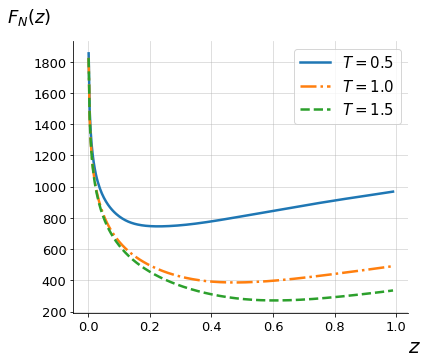

In [4]:
# plotting "Potential landscape"
# Taken from interior of `plot_potential_zero_one` in `potential_plots`

mvals = 300 # number of points to plot
ztest = np.linspace(0.001, 0.99, mvals) # values to evaluate potential
Tlist = [0.5, 1.0, 1.5]

# figure
plt.figure(figsize = (6, 5))
ax = plt.subplot(111)

marker_list = ['solid', 'dashdot', 'dashed']

# Plotting function for three temperature values
Fvals_dict = dict() # empty dictionary of F values
for i in range(len(Tlist)):
    Fvals_dict[i] = np.zeros(mvals)
    for k in range(mvals):
        Fvals_dict[i][k] = FN_zero_one(ztest[k], weights = weight_vec, values = value_vec, limit = Wlimit, T= Tlist[i])
    ax.plot(ztest, Fvals_dict[i], label = r'$T = %.1f$' % Tlist[i], linestyle = marker_list[i], linewidth = 2.5)


# plot sides
plt.xlabel(r'$z$', fontsize = 20, x = 1.02)
plt.ylabel(r'$F_N(z)$', fontsize = 18, rotation = 0,y = 1.05)
plt.yticks(fontsize= 13)
plt.xticks(fontsize=13 )
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(alpha = 0.5)
plt.legend(loc = 'best', fontsize = 15)

plt.savefig('/Users/mobolajiwilliams/Dropbox/0Tex_Files_Mac/2020_largeN_knapsack_problem/arxiv_submission/FN_plot0.png', format='png', bbox_inches = 'tight')


plt.show()